In [5]:
# 1. Cargar un el conjunto de datos del IRIS data set
# Importamos la libreria ''
from sklearn.datasets import load_iris

data = load_iris()
#print(data)

In [153]:
# 2. Una vez cargado convertir a pandas
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
data_panda = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

#print(data_panda)


In [21]:
# 3. Obtener información básica:3
# - Numero de features
features = iris.feature_names
numeroFeatures = len(features)
print('numero de features:',numeroFeatures)

# - Nombre de las features
print('features:', features)

# - Rango de valores del target
target = iris.target
minimo = min(target)
maximo = max(target)
print('Rango -> ','min:',minimo, ' max:', maximo)

# - Valor medio de las features
media_features = np.mean(data_panda) 
print('media de las features:','\n',media_features)  #mean : hace la media de cada una de  las columnas de la tabla



numero de features: 4
features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Rango ->  min: 0  max: 2
media de las features: 
 sepal length (cm)    5.843333
sepal width (cm)     3.054000
petal length (cm)    3.758667
petal width (cm)     1.198667
target               1.000000
dtype: float64


In [35]:
# 4. Obtener información estadística:
# 4.1 La media de los valores de cada feature, para cada tipo de flor (flor = target)
print('<--- Media de los valores de cada feature ')
print('<----', data.target_names[0])
print(np.mean(data_panda[target == 0]))
print('<----', data.target_names[1])
print(np.mean(data_panda[target == 1]))
print('<----', data.target_names[2])
print(np.mean(data_panda[target == 2]))

# 4.2 Los valores de la flor sepal length más grande y más pequeño
# argmax: funcion que devuelve el indice del max 
indice_grande = data_panda["sepal length (cm)"].argmax()
# argmin: funcion que devuelve el indice del min
indice_pequeno = data_panda["sepal length (cm)"].argmin()
# Loc: funcion que devulve la fila de (indice) que se le pasa como parametro
fila_grande = data_panda.loc[indice_grande]
fila_pequeno = data_panda.loc[indice_pequeno]

print('<--- Valoress de la flor sepal length más grande ')
print(fila_grande)
print('<--- Valoress de la flor sepal length más pequeño ')
print(fila_pequeno)




<--- Media de los valores de cada feature 
<---- setosa
sepal length (cm)    5.006
sepal width (cm)     3.418
petal length (cm)    1.464
petal width (cm)     0.244
target               0.000
dtype: float64
<---- versicolor
sepal length (cm)    5.936
sepal width (cm)     2.770
petal length (cm)    4.260
petal width (cm)     1.326
target               1.000
dtype: float64
<---- virginica
sepal length (cm)    6.588
sepal width (cm)     2.974
petal length (cm)    5.552
petal width (cm)     2.026
target               2.000
dtype: float64
<--- Valoress de la flor sepal length más grande 
sepal length (cm)    7.9
sepal width (cm)     3.8
petal length (cm)    6.4
petal width (cm)     2.0
target               2.0
Name: 131, dtype: float64
<--- Valoress de la flor sepal length más pequeño 
sepal length (cm)    4.3
sepal width (cm)     3.0
petal length (cm)    1.1
petal width (cm)     0.1
target               0.0
Name: 13, dtype: float64


In [36]:

# 5. Obtener la correlación cruzada de todas las features (etiquetas)
data_panda.corr(method='pearson')
data_panda.corr(method='kendall')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.072112,0.717624,0.654960,0.670444
sepal width (cm),-0.072112,1.000000,-0.182391,-0.146988,-0.333435
petal length (cm),0.717624,-0.182391,1.000000,0.803014,0.822949
petal width (cm),0.654960,-0.146988,0.803014,1.000000,0.838757
target,0.670444,-0.333435,0.822949,0.838757,1.000000


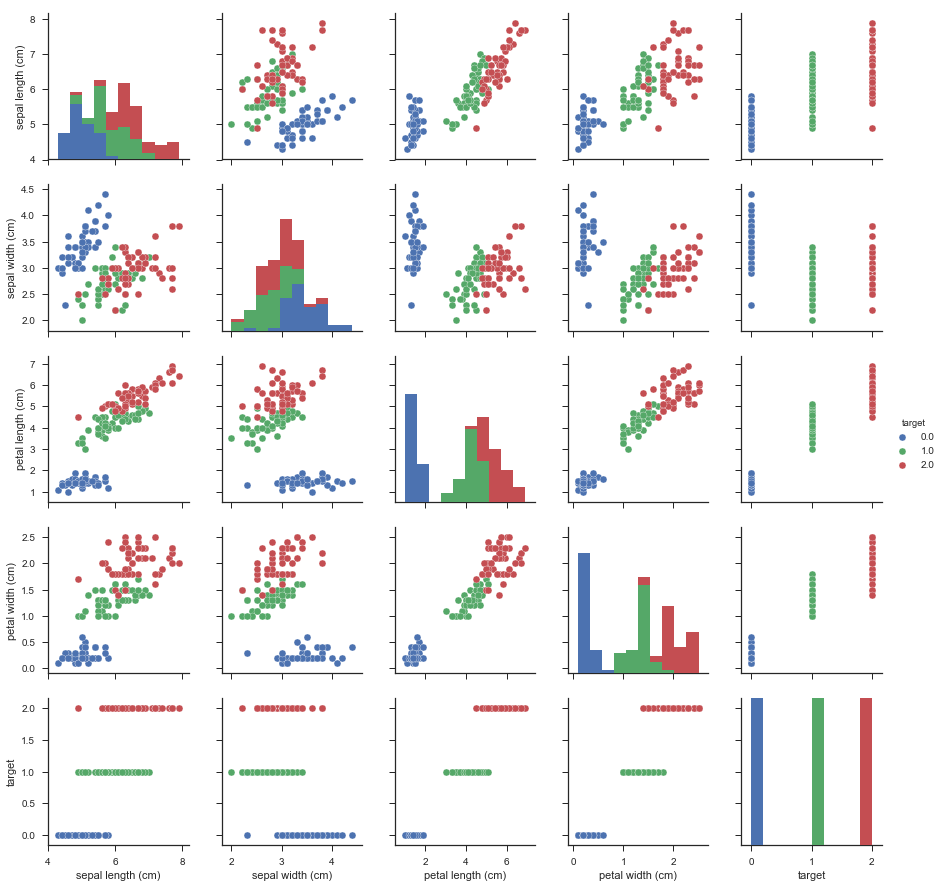

In [41]:

# 6. Visualiza las con Seaborn Pairplot la correlación de las features
# Sirve para poder visualizar las graficas online
%matplotlib inline

# libreria para usar las graficas
import seaborn as sns; sns.set(style="ticks", color_codes=True)

# Mostramos la grafica y pintamos los puntos segun el target
sns.pairplot(data_panda, hue="target")


In [152]:
''' 
7. Utiliza train/split y KNN para entrenar un modelo
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Repítelo para diferentes valores K del, 1 al 50
- ¿Cuál es el mejor modelo? ¿Cuál es el peor?
   
    k = 1  -> 0.98333333333333328
    k = 2  -> 0.98333333333333328
    k = 30 -> 1.0
    ..
    k = 49 -> 0.96666666666666667
    k = 50 -> 0.93333333333333335
    k = 80 -> 0.41666666666666669
    
- ¿Qué matriz de confusión de da el mejor model? ¿y el peor?
'''
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

iris = load_iris()
data_frame = pd.DataFrame(   data=np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
# Lo transformamos en un pandas

X = data_frame[iris['feature_names']]  # features
y = data_frame['target']               # targets

print(X.shape) # muestra el numero de filas y columnas
print(y.shape)

# Vamos a entrenar 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X,y)

# Vamos a predecir las siquientes filas con las siguientes 'features' 
fila1 = [1,2,4,4]
fila2 = [5,5,3,1]
fila3 = [0,2,1,3]
knn.predict([fila1, fila2, fila3])


(150, 4)
(150,)


array([ 1.,  0.,  0.])

In [151]:
# Vamos a entrenar el algoritmo para algun k (numero de vecinoa)
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Vamos a dividir nuestros conjuntos (40% para entrenar y 60% para test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# entrenamos el algoritmo con el 60% de los datos 
knn.fit(X_train,y_train)

# realizamos la prediccion con el otro 40% de los datos 
y_pred = knn.predict(X_test)

# Con esta libreria nos dira como de bien esta mi modelo 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.98333333333333328

In [145]:
#- ¿Qué matriz de confusión de da el mejor model? ¿y el peor? 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
# k = 50 da el peor resultado
'''
array([[23,  0,  0],
       [ 0, 17,  2],
       [ 0,  2, 16]])
'''

array([[23,  0,  0],
       [ 0, 17,  2],
       [ 0,  2, 16]])

In [149]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 
# k = 20,21,22,23 da el mejor resultado
'''
array([[23,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 18]])
'''

array([[23,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 18]])